# 线性回归（Linear Regression）
线性回归是一种基本的监督学习算法，用于预测一个连续的目标变量（因变量）与一个或多个自变量（特征变量）之间的关系。线性回归假设目标变量与自变量之间存在线性关系，并试图通过拟合一条直线来描述这种关系。
$$y = w*x + b$$
- $y$：预测值（目标变量）
- $x$：输入特征（自变量）
- $w$：权重（斜率）
- $b$：偏置（截距）

线性回归的目标是找到最佳的权重和偏置，使得预测值与实际值之间的误差最小化。常用的误差度量方法是均方误差（Mean Squared Error, MSE）。
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
- $n$：样本数量
- $y_i$：实际值
- $\hat{y}_i$：预测值

通过调整`w`和`b`，使得MSE最小化。

## 线性回归的求解

### 最小二乘法（Ordinary Least Squares, OLS）
最小二乘法是一种常用的线性回归求解方法，通过最小化预测值与实际值之间的平方误差来找到最佳的权重和偏置。最小二乘法的目标是是最小化残差平方和（Residual Sum of Squares, RSS）：
$$RSS = \sum_{i=1}^{n} (y_i - (w*x_i + b))^2$$
通过最小化RSS，可以得到正规方程：
$$\left\{ \begin{array}{l} w \sum_{i=1}^{n} x_i^2 + b \sum_{i=1}^{n} x_i = \sum_{i=1}^{n} x_i y_i \\ w \sum_{i=1}^{n} x_i + nb = \sum_{i=1}^{n} y_i \end{array} \right.$$

其矩阵形式为：
$$\begin{bmatrix} \sum_{i=1}^{n} x_i^2 & \sum_{i=1}^{n} x_i \\ \sum_{i=1}^{n} x_i & n \end{bmatrix} \begin{bmatrix} w \\ b \end{bmatrix} = \begin{bmatrix} \sum_{i=1}^{n} x_i y_i \\ \sum_{i=1}^{n} y_i \end{bmatrix}$$

求解上述矩阵可以得到最佳的$w$和$b$的解析解：
$$\begin{bmatrix} w \\ b \end{bmatrix} = \begin{bmatrix} \sum_{i=1}^{n} x_i^2 & \sum_{i=1}^{n} x_i \\ \sum_{i=1}^{n} x_i & n \end{bmatrix}^{-1} \begin{bmatrix} \sum_{i=1}^{n} x_i y_i \\ \sum_{i=1}^{n} y_i \end{bmatrix}$$

### 梯度下降法（Gradient Descent）
梯度下降法是一种迭代优化算法，用于通过不断调整参数来最小化损失函数 $J(w, b)$。在每次迭代中，参数根据损失函数的梯度进行更新。对于线性回归，损失函数通常选择均方误差（MSE）:
$$J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2$$
- $m$：样本数量
- $y_i$：实际值
- $\hat{y}_i$：预测值
梯度是损失函数对参数的偏导数，用于指导参数更新的方向，对于线性回归，梯度计算如下：
$$\frac{\partial J}{\partial w} = -\frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i) x_i$$
$$\frac{\partial J}{\partial b} = -\frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)$$

参数更新规则为：
$$w := w - \alpha \frac{\partial J}{\partial w}$$
$$b := b - \alpha \frac{\partial J}{\partial b}$$
- $\alpha$：学习率（learning rate），控制每次更新的步长。

梯度下降法的步骤：
1. 初始化参数 $w$ 和 $b$（通常为0或小的随机值）。
2. 计算预测值 $\hat{y}_i$。
3. 计算损失函数 $J(w, b)$。
4. 计算梯度 $\frac{\partial J}{\partial w}$ 和 $\frac{\partial J}{\partial b}$。
5. 更新参数 $w$ 和 $b$。
6. 重复步骤2-5，直到收敛（损失函数变化很小或达到预设的迭代次数）。


## 使用Python实现线性回归

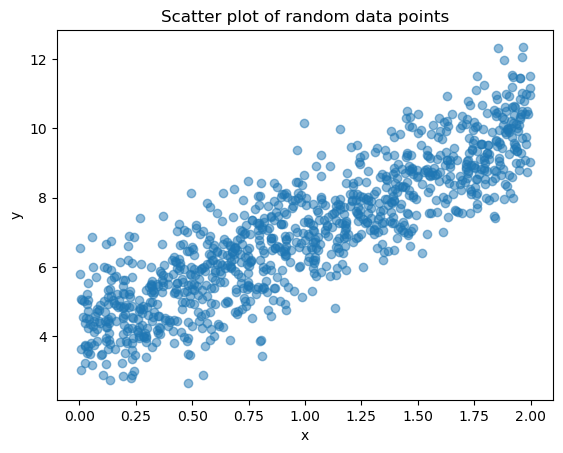

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate a lot of random data points
np.random.seed(0)
x = 2 * np.random.rand(1000, 1)
y = 4 + 3 * x + np.random.randn(1000, 1)

# Visualize the data
plt.scatter(x, y, alpha=0.5)
plt.title("Scatter plot of random data points")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Coefficient: 2.9514811687620033
Intercept: 4.077167249324065


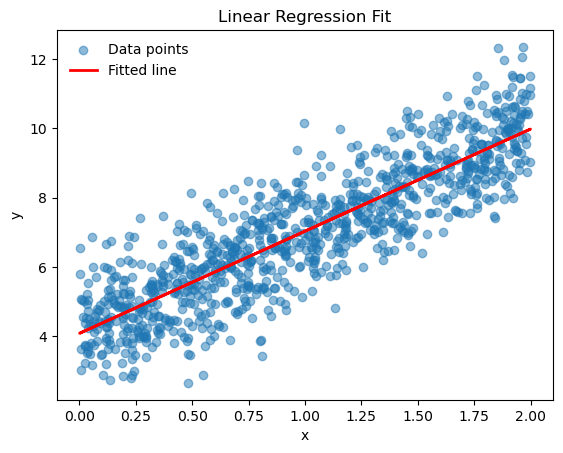

In [5]:
# Use the Scikit-learn library to perform linear regression

## Create and fit the model
model = LinearRegression()

## Fit the model to the data
model.fit(x, y)

## Output the results of the linear regression $w$ and $b$
print("Coefficient:", model.coef_[0][0])
print("Intercept:", model.intercept_[0])

## predict y values using the fitted model
y_pred = model.predict(x)

## Visualize the fitted line
plt.scatter(x, y, alpha=0.5, label='Data points')
plt.plot(x, y_pred, color='red', linewidth=2, label='Fitted line')
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(frameon=False)
plt.show()


In [6]:
## use the `score()` method to evaluate the model's 
# performance, returning the coefficient of 
# determination R^2 of the prediction.
r2_score = model.score(x, y)
print("R^2 score:", r2_score)

R^2 score: 0.7593229501974785


## Manual implementation of Linear Regression using Gradient Descent

Coefficient (w): 2.9854471487199765
Intercept (b): 4.037252265984246
R^2 score (manual): 0.7592123851000013


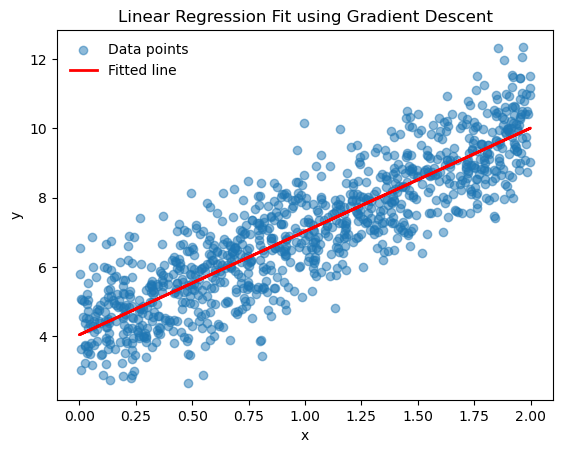

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate a lot of random data points
np.random.seed(0)
x = 2 * np.random.rand(1000, 1)
y = 4 + 3 * x + np.random.randn(1000, 1)

# Initialize parameters
w = 0.0  # slope
b = 0.0  # intercept
learning_rate = 0.01
n_iterations = 1000

# Gradient Descent
m = len(y)
for iteration in range(n_iterations):
    y_pred = w * x + b
    dw = (-2/m) * np.sum(x * (y - y_pred))
    db = (-2/m) * np.sum(y - y_pred)
    w -= learning_rate * dw
    b -= learning_rate * db

# Output the results of the linear regression w and b
print("Coefficient (w):", w)
print("Intercept (b):", b)

r2_score = 1 - (np.sum((y - (w * x + b))**2) / np.sum((y - np.mean(y))**2))
print("R^2 score (manual):", r2_score)

# Visualize the fitted line
y_pred = w * x + b
plt.scatter(x, y, alpha=0.5, label='Data points')
plt.plot(x, y_pred, color='red', linewidth=2, label='Fitted line')
plt.title("Linear Regression Fit using Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(frameon=False)
plt.show()